In [24]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

from sklearn import datasets
from sklearn.decomposition import PCA
from IPython.display import Image

Based on the tutorial presented here: http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

## Iris Plants Database

This is perhaps the best known database to be found in the pattern recognition literature.  
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  
One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.  

We have measurements from 150 Iris flowers from 3 different species.

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class:  
      -- Iris Setosa  
      -- Iris Versicolour  
      -- Iris Virginica  

Sources:  
     (a) Creator: R.A. Fisher  
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)  
     (c) Date: July, 1988  
     


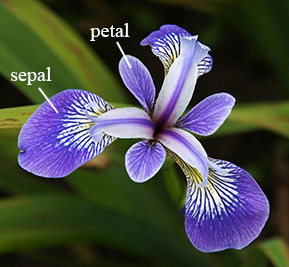

In [25]:
Image("images/iris_with_labels.jpg")

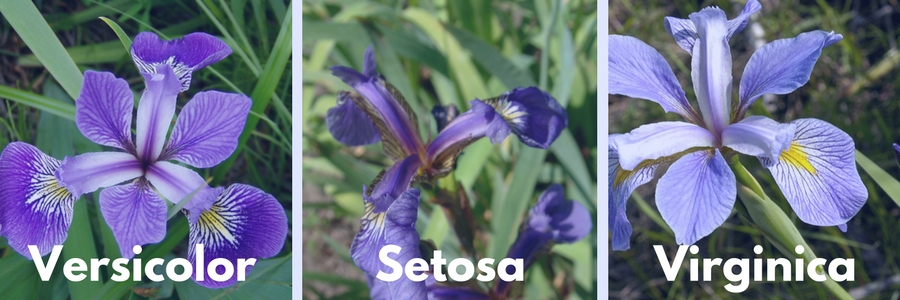

In [26]:
Image("images/iris_types.jpg")

### Lets import the dataset and play around

In [27]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('ds/iris.data', header=None, names=columns)
df.dropna(how="all", inplace=True)

In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
df.groupby('class').mean()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


### Next, we seperate the dataframe into class labels and an attribute matrix

In [30]:
mat = df.iloc[:, :4]

classes = df.iloc[:, 4].values
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### How does each feature vary across species?

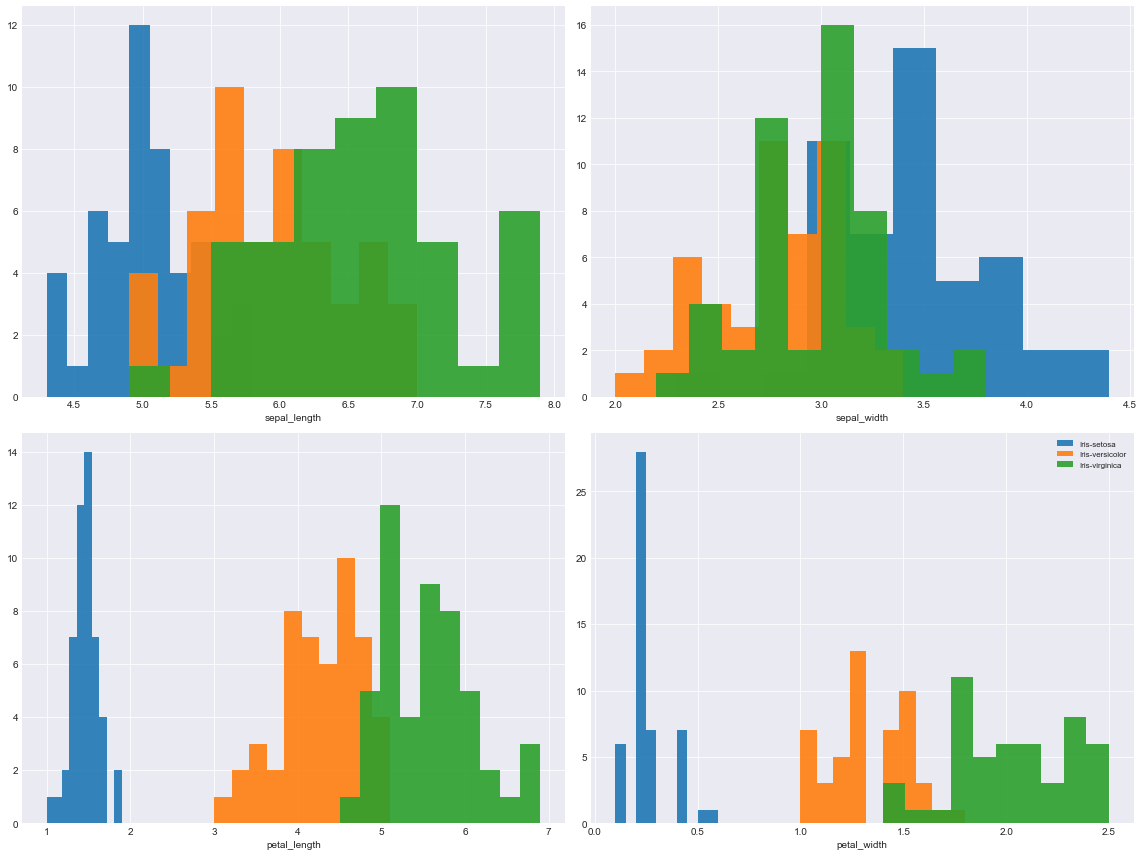

In [31]:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal_length',
                1: 'sepal_width',
                2: 'petal_length',
                3: 'petal_width'}

with plt.style.context('seaborn-darkgrid'):
    plt.figure(figsize=(16, 12))
    
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(df[df['class'] == lab][feature_dict[cnt]],
                     label=lab,
                     bins=10,
                     alpha=0.9,)
        plt.xlabel(feature_dict[cnt])
    
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()
    
    

# A Summary of the PCA Approach
* Standardize the data.
* Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
* Sort eigenvalues in descending order and choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues where $k$ is the number of dimensions of the new feature subspace ($k \leq d$).
* Construct the projection matrix $W$ from the selected $k$ eigenvectors.
* Transform the original dataset $X$ via $W$ to obtain a $k$-dimensional feature subspace $Y$.

In [32]:
from sklearn.preprocessing import StandardScaler

## Step 1 - Preprocessing/Scaling
 We'll scale the data to have a mean of 0 and variance of 1  
 We can use the StandardScaler class from sklearn for this

In [33]:
scaler = StandardScaler()
mat_std = scaler.fit_transform(mat)

print(mat.values[0])
print(mat_std[0])

mat_std

[ 5.1  3.5  1.4  0.2]
[-0.90068117  1.03205722 -1.3412724  -1.31297673]


array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

## Step 2 - Eigendecomposition

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix $\Sigma$, which is a 
$d \times d$ matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:

$$\sigma_{jk} = \frac{1}{n-1} (X - \overline{x})^T (X - \overline{x})$$

where $\overline{x}$ is the mean vector, $\frac{1}{n} \sum_{i=i}^{n} x_i$

The mean vector is a $d$-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

### We'll use the covariance matrix approach, but you could also use the correlation matrix or perform Singular Vector Decomposition

In [34]:
mean_vec = np.mean(mat_std, axis=0) # by column
cov_mat = (mat_std - mean_vec).T.dot((mat_std - mean_vec)) / (mat_std.shape[0] - 1)
print(cov_mat)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


#### Is there a library for that?

In [35]:
cov_mat = np.cov(mat_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [36]:
print(eig_vals)

[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [37]:
print(eig_vecs.T)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]]


## Step 3 - Selecting Principal Components

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top $k$
eigenvectors.

In [38]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [39]:
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0],": ",i[1])

Eigenvalues in descending order:
2.93035377559 :  [ 0.52237162 -0.26335492  0.58125401  0.56561105]
0.927403621517 :  [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
0.148342226482 :  [-0.72101681  0.24203288  0.14089226  0.6338014 ]
0.0207460139956 :  [ 0.26199559 -0.12413481 -0.80115427  0.52354627]


### Explained Variance
After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [40]:
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([  72.77045209,   95.80097536,   99.48480732,  100.        ])

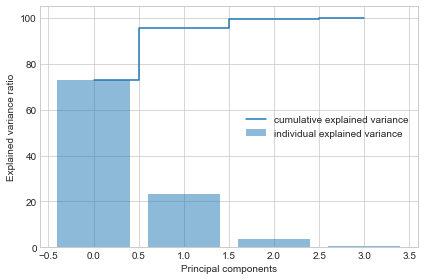

In [41]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

## Step 4 - Projection Matrix
The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. Although, the name “projection matrix” has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.


Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our $d \times k$-dimensional eigenvector matrix $W$.

In [42]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
print(matrix_w)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


## Step 5 - Projecting onto the new feature space

In this last step we will use the $4\times2$-dimensional projection matrix $W$ to transform our samples onto the new subspace via the equation
$$Y=X\times W$$
, where $Y$ is a $150\times 2$ matrix of our transformed samples.

In [54]:
Y = mat_std.dot(matrix_w)
# print(Y)
mat_std
# len(Y)
# len(classes)
# len(mat_std)

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

Now, what we have after applying the linear PCA transformation is a lower dimensional subspace (from 4D to 2D in this case), where the samples are “most spread” along the new feature axes.

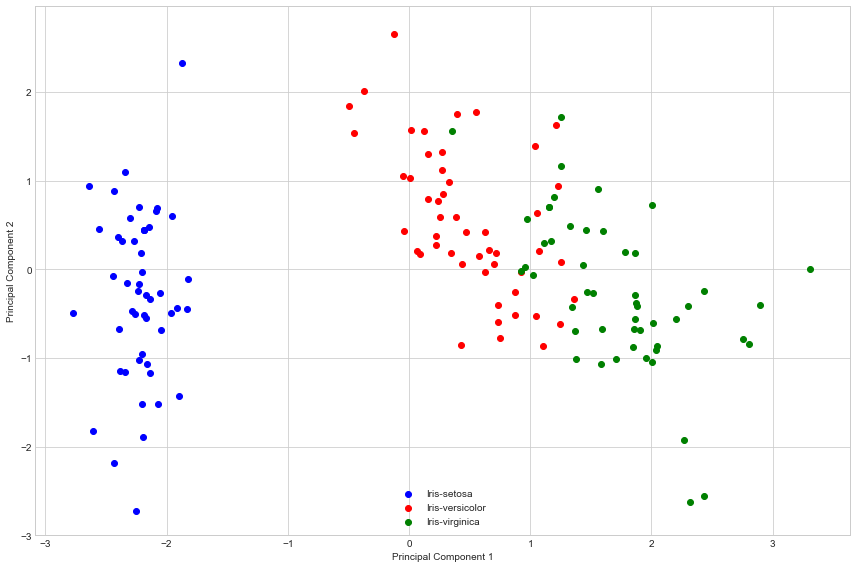

In [44]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[classes == lab, 0],
                    Y[classes == lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [45]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(mat_std)

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = sklearn_pca.components_[0] 
yvector = sklearn_pca.components_[1]

xs = sklearn_pca.transform(mat_std)[:,0] 
ys = sklearn_pca.transform(mat_std)[:,1]




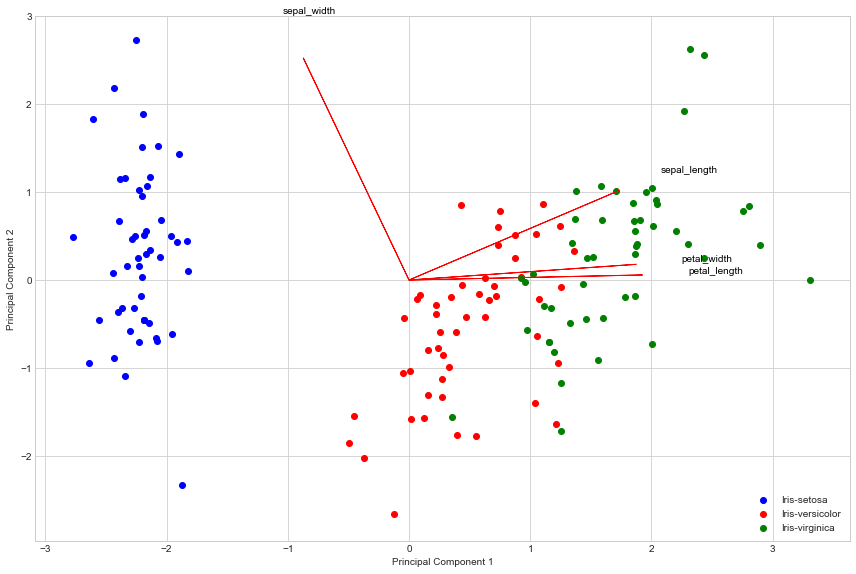

In [46]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[classes==lab, 0],
                    Y_sklearn[classes==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    
    
    for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
        plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    
        plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(df.columns.values)[i], color='black')
    
    plt.show()

In [47]:
print(xvector)
print(yvector)

[ 0.52237162 -0.26335492  0.58125401  0.56561105]
[ 0.37231836  0.92555649  0.02109478  0.06541577]
